In [1]:
import pandas as pd
!pip3 install matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../OUTPUT/ordered_set.csv")

In [3]:
'''
Quiero crear una nueva columna que identifique la cantidad de ataques en cada pais. Una vez conseguido esto, 
intentare hacer un cutoff en distintas categorias dependiendo de la cantidad de ataques por pais.
'''

df['Attacks per Country'] = df["Country"].value_counts()
df1 = df [['Year', 'Date', 'Time', 'Country', 'Attacks per Country', 'Sex ', 'Age','Activity', 'Fatal (Y/N)', 'Species ', 'Case Number']]

In [4]:
df1

,Year,Date,Time,Country,Attacks per Country,Sex,Age,Activity,Fatal (Y/N),Species,Case Number
0,2016,18-Sep-16,13h00,USA,NaN,M,16,Surfing,N,NaN,2016.09.18.c
1,2016,18-Sep-16,11h00,USA,NaN,M,36,Surfing,N,NaN,2016.09.18.b
2,2016,18-Sep-16,10h43,USA,NaN,M,43,Surfing,N,NaN,2016.09.18.a
3,2016,17-Sep-16,NaN,AUSTRALIA,NaN,M,NaN,Surfing,N,NaN,2016.09.17
4,2016,16-Sep-16,NaN,AUSTRALIA,NaN,M,NaN,Surfing,N,2 m shark,2016.09.15
...,...,...,...,...,...,...,...,...,...,...,...
5068,1916,Reported 24-Jun-1916,NaN,ATLANTIC OCEAN,NaN,M,NaN,Jumped overboard from Norwegian steamship Venator,Y,NaN,1916.06.24.R
5069,1916,23-Jun-16,NaN,USA,NaN,M,26,NaN,N,NaN,1916.06.23
5070,1916,Reported 25-Apr-1916,NaN,AUSTRALIA,NaN,M,NaN,Swimming,Y,NaN,1916.04.25.R
5071,1916,03-Apr-16,NaN,AUSTRALIA,NaN,M,17,Clinging to overturned rowing boat,Y,NaN,1916.04.03


PAPUA NEW GUINEA     128
SOUTH AFRICA         519
AUSTRALIA           1064
USA                 1924
Name: Country, dtype: int64

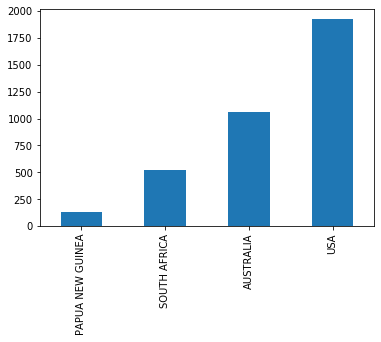

In [5]:
#PRIMER PASO: ASIGNAR LOS ATAQUES POR PAIS A UNA VARIABLE
df1["Country"].value_counts()
country_values = df1["Country"].value_counts().sort_values()
country_values
#SEGUNDO PASO: FILTRAR PARA QUEDARME CON LOS 4 PAISES EN LOS QUE MAS ATAQUES HAY
country_values_filtered = country_values[country_values>100]
display(country_values_filtered)
#TERCER PASO: PLASMARLO EN UN DIAGRAMA DE BARRAS
country_values_filtered.plot.bar()

In [6]:
#country_values_filtered.index
info = {'Country': ['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'PAPUA NEW GUINEA'],
      'Attacks since 1916': country_values_filtered.sort_values(ascending=False)}
df2 = pd.DataFrame (data=info)
df2.reset_index(inplace=True)
df2 = df2.drop(['index'], axis=1)
df2

,Country,Attacks since 1916
0,USA,1924
1,AUSTRALIA,1064
2,SOUTH AFRICA,519
3,PAPUA NEW GUINEA,128


In [7]:
#AHORA QUIERO DIVIDIR LAS ACTIVIDADES EN 4 CATEGORIAS: SURFING, SWIMMING, FISHING & OTHER

In [8]:
set(df1['Activity'])
df1['Activity'].value_counts()

Surfing                                                                              901
Swimming                                                                             660
Fishing                                                                              342
Spearfishing                                                                         320
Wading                                                                               133
                                                                                    ... 
Washed overboard into school of fish                                                   1
Went over side of boat at trochus ground                                               1
The Cuban freighter Libertad was torpedoed and sunk by the German submarine U-129      1
Dived onto shark from floating stage                                                   1
Jumped into the water from a cliff                                                     1
Name: Activity, Lengt

In [9]:
import re
df1['Activity'] = [re.sub('.*[Ss]urf.*', 'Surfing',str(e)) for e in df1['Activity']]
df1['Activity'] = [re.sub('.*[Ss]wim.*', 'Swimming',str(e)) for e in df1['Activity']]
df1['Activity'] = [re.sub('.*[Ff]ish.*', 'Fishing',str(e)) for e in df1['Activity']]
activity = ['Surfing', 'Swimming', 'Fishing']

In [10]:
df1['Activity'][~df1['Activity'].isin(activity)] = 'Other'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


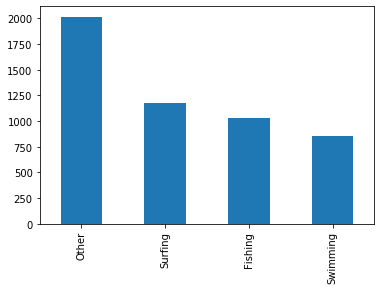

In [11]:
activities_values = df1['Activity'].value_counts()
activities_values
activities_values.plot.bar()

In [12]:
df1['Activity'].value_counts()

Other       2016
Surfing     1178
Fishing     1029
Swimming     850
Name: Activity, dtype: int64

In [ ]:
#QUIERO HACER UN NUEVO DATA FRAME PARA QUE SOLO ME COJA LOS PAISES EN LOS QUE HAY MAS DE 100 ATAQUES.
filtered = 

In [13]:
df3 = pd.DataFrame(df1.groupby('Country')['Activity'].value_counts())

In [14]:
df3 = df3.rename(columns={'Activity': 'Count'})

In [15]:
df3

Count
Country           Activity       
 PHILIPPINES      Swimming      1
 TONGA            Fishing       2
                  Other         1
ADMIRALTY ISLANDS Other         1
AMERICAN SAMOA    Swimming      2
...                           ...
VIETNAM           Swimming      4
                  Fishing       1
WESTERN SAMOA     Swimming      1
YEMEN             Other         1
                  Swimming      1

[343 rows x 1 columns]

In [17]:
df3["Country"].value_counts()

KeyError: 'Country'